# Проект

Импортируем необходимые библиотеки

In [126]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

Часть с парсингом закончена. Теперь работаем с данными

## Часть 2. Визуализация и EDA

Уже из нового файла благодаря парсингу откроем таблицу

In [33]:
df = pd.read_csv('AnDan_project.csv', sep=',')
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
1995,male,group C,some college,standard,none,77,77,71
1996,male,group C,some college,standard,none,80,66,66
1997,female,group A,high school,standard,completed,67,86,86
1998,male,group E,high school,standard,none,80,72,62


Определим к какому виду переменных относятся переменные в нашей таблице. 

In [3]:
df.dtypes

Gender                         object
Race/ethnicity                 object
Parental level of education    object
Lunch                          object
Test preparation course        object
Math score                      int64
Reading score                   int64
Writing score                   int64
dtype: object

В получившейся таблице первые 5 колонок содержат категориальные переменные и следующие 3 колонки содержащат количественные переменные. 
Опишем все колонки по порядку. 

• "Gender" (Пол): пол учащегося (male - мужской/ female - женский)

• "Race / ethnicity" (Раса/этническая принадлежность): расовая или этническая принадлежность учащегося (group A, B, C, D, E). Чтобы избежать оценочных суждений по расовому признаку эти переменные не имеют определенного реального выражения и выделены в группы

• "Parental level of education" (Уровень образования родителей): самый высокий уровень образования, полученный родителем (родителями) или опекуном (опекунами) учащегося.

• "Lunch" (Обед): получает ли учащийся стандартный обед или обед по сниженной цене (standart - стандартный, free/reduced - бесплатный или по сниженной цене)

• "Test preparation course" (Курс подготовки к экзаменам): прошел ли учащийся курс подготовки к экзаменам (completed - да/ none - нет)

• "Math score" (Оценка по математике): балл учащегося по стандартному тесту по математике.

• "Reading score" (Оценка по чтению): балл учащегося по стандартному тесту по чтению.

• "Writing score" (Оценка по письму): балл учащегося по стандартному  тесту по письму.


Проверим есть ли в данных пропуски. 

In [4]:
df.isna().sum()

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64

Судя по полученной информации, ни в одной колонке пропусков нет. С данными можно продолжать работать. 

Рассмотрим колонку с информацией об образовании родителей (опекунов). 

In [5]:
df['Parental level of education'].value_counts()

some college          448
high school           430
associate's degree    408
some high school      354
bachelor's degree     210
master's degree       150
Name: Parental level of education, dtype: int64

В этой колонке существуют такие переменные, как "high school" и "some high school". Не совсем понятна разница между ними, 
поэтому соединим их. Также уберем слово "some" из "some college". 

In [6]:
df = df.replace('some high school', 'high school')
df = df.replace('some college', 'college')

In [7]:
df['Parental level of education'].value_counts()

high school           784
college               448
associate's degree    408
bachelor's degree     210
master's degree       150
Name: Parental level of education, dtype: int64

Нам удалось изменить переменные в колонке. Продолжим с ней работать.

Text(0, 0.5, 'Count')

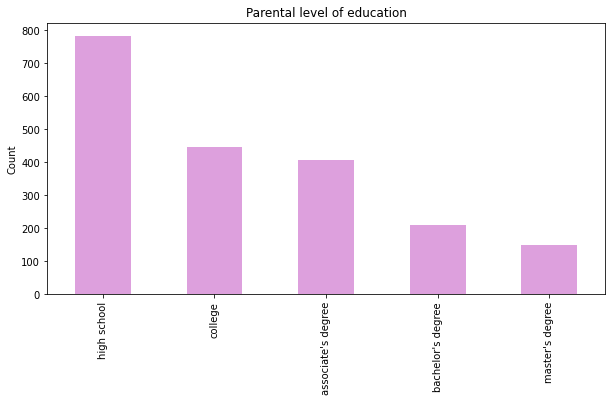

In [8]:
ed = df['Parental level of education'].value_counts().plot(kind = 'bar', title = 'Parental level of education', color = 'plum', figsize=(10, 5))
ed.set_ylabel('Count')

Так, родители большинства учеников, почти половина, закончили только школу, около 200 закончили колледж и примерно треть имеют ученую степень

Рассмотрим столбцы с баллами за тесты. Просуммируем баллы каждого ученика по всем предметам, чтобы найти общий балл.

In [34]:
df['Total_score'] = df['Math score'] + df['Reading score'] + df['Writing score']
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,some college,standard,none,77,77,71,225
1996,male,group C,some college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


Text(0.5, 0, 'Points')

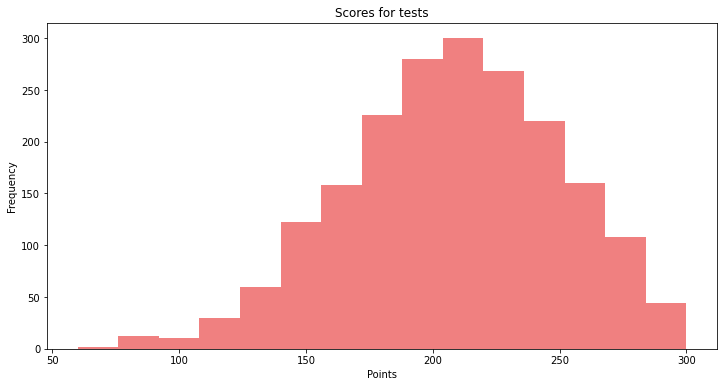

In [10]:
scores = df['Total_score'].plot(kind = 'hist', bins = 15, title = 'Scores for tests', color = 'lightcoral', figsize=(12,6))
scores.set_xlabel('Points')

Таким образом, большинство учеников имеют общий бал 200-210, распределение баллов похоже на нормальное, однако баллы больше среднего встречаются с одинаково убывающей частотой, а с меньшей стороны - наоборот, резко. Кроме того в промежутке от 50 до 100 могут иметь место выбросы

Text(0.5, 0, 'Points')

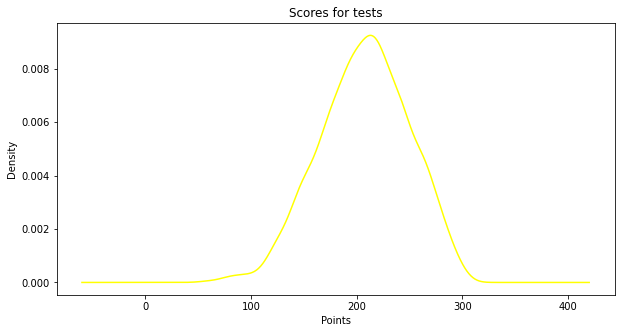

In [11]:
scores = df['Total_score'].plot(kind = 'kde', title = 'Scores for tests', color = 'yellow', figsize=(10, 5))
scores.set_xlabel('Points')

Судя по графику, самые распространенные баллы за тесты около 200. Распределение является нормальным

Рассмотрим колонку с информацией о поле.

Text(0.5, 0, 'Counts')

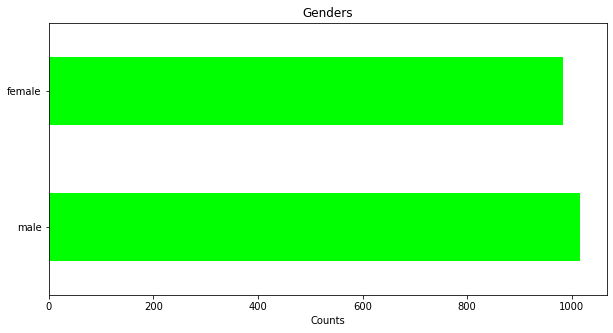

In [12]:
gend = df['Gender'].value_counts().plot(kind = 'barh', title = 'Genders', color='lime', figsize=(10, 5))
gend.set_xlabel('Counts')

Таким образом, мальчиков незначительно больше, чем девочек

Создадим графики ко всем остальным колонкам для облегчения их анализа. 

Text(0.5, 0, 'Counts')

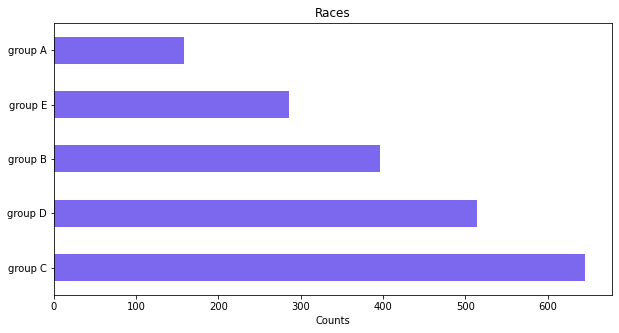

In [13]:
race = df['Race/ethnicity'].value_counts().plot(kind = 'barh', title = 'Races', color = 'mediumslateblue', figsize=(10, 5))
race.set_xlabel('Counts')

Так, имеется существенное различие в частоте, с которой встречаются разные расы. Самая многочисленная - группа С, а самая малочисленная - А

Text(0.5, 0, 'Counts')

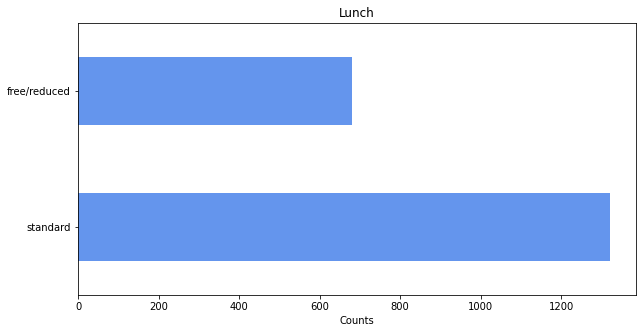

In [14]:
lunch = df['Lunch'].value_counts().plot(kind = 'barh', title = 'Lunch', color='cornflowerblue', figsize=(10, 5))
lunch.set_xlabel('Counts')

Большинство студентов ели стандартный ланч, и около трети - социальный (бесплатный). В таких датасетах эта характеристика является способом показать уровень доходов школьника 

Text(0.5, 0, 'Counts')

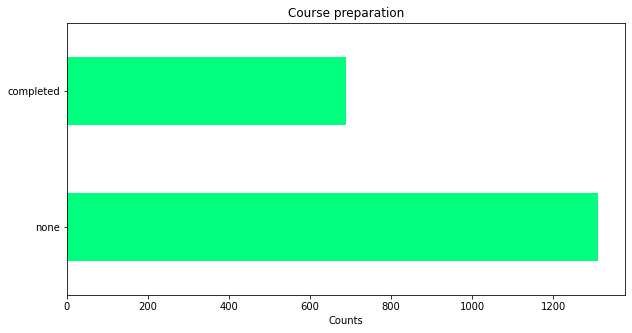

In [15]:
course = df['Test preparation course'].value_counts().plot(kind = 'barh', title = 'Course preparation', color = 'springgreen', figsize=(10, 5))
course.set_xlabel('Counts')

Только треть студентов прошли подготовительный курс, то есть это не связано с уровнем достатка (ланч).

In [35]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,some college,standard,none,77,77,71,225
1996,male,group C,some college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


Зависимость между образованием родителей и общим баллом 

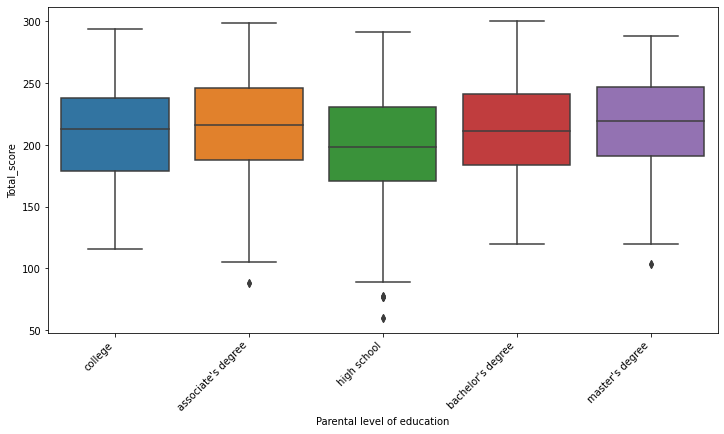

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Parental level of education', y = 'Total_score', data = df)
plt.xticks(rotation=45, 
           ha='right')
plt.show()

Зависимость между образованем родителей и общим баллом по тестам учащихся. 

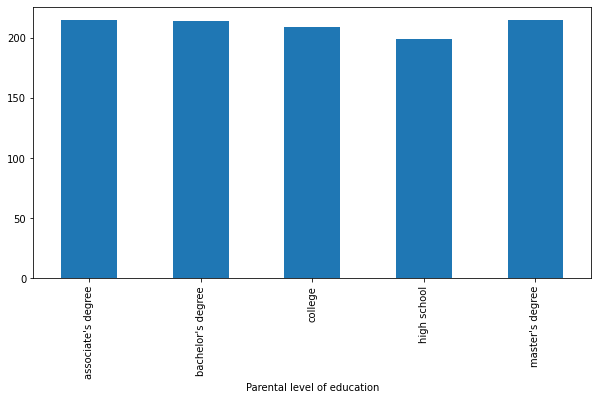

In [18]:
ed_mean = df.groupby('Parental level of education')['Total_score'].mean().plot(kind = 'bar', figsize=(10, 5))

Зависимость между прохождением курса и суммарными баллами

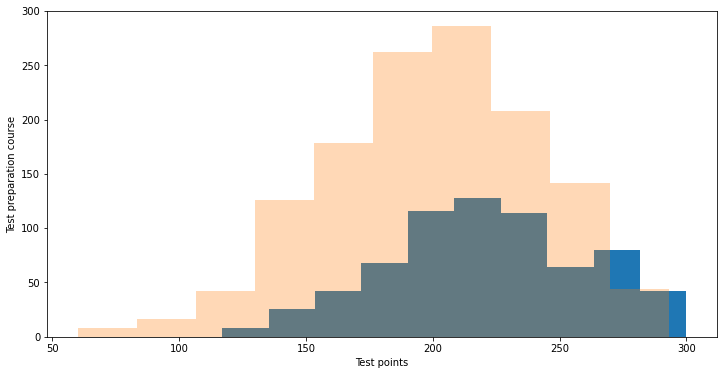

In [19]:
plt.figure(figsize=(12,6))
plt.hist(x = df[df['Test preparation course'] == 'completed']['Total_score'])
plt.hist(x = df[df['Test preparation course'] == 'none']['Total_score'], alpha = 0.3)
plt.xlabel("Test points")
plt.ylabel("Test preparation course")
plt.show()

Зависимость между присутствием бесплатного ланча и суммарными баллами

<Axes: xlabel='Total_score', ylabel='Count'>

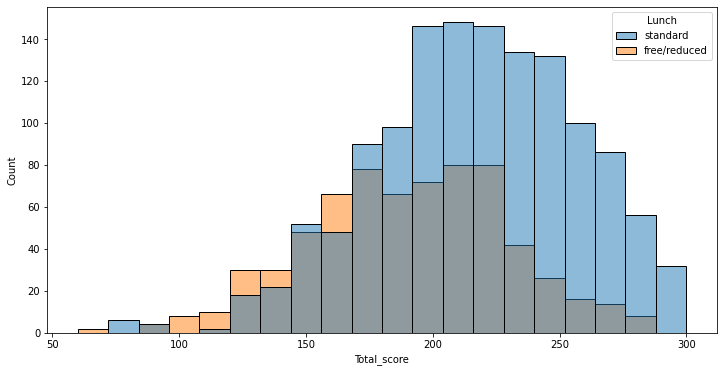

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(x = 'Total_score', hue = 'Lunch', data = df, bins = 20)

Зависимость между прохождением курса и присутствием бесплатного обеда

<Axes: xlabel='Lunch', ylabel='count'>

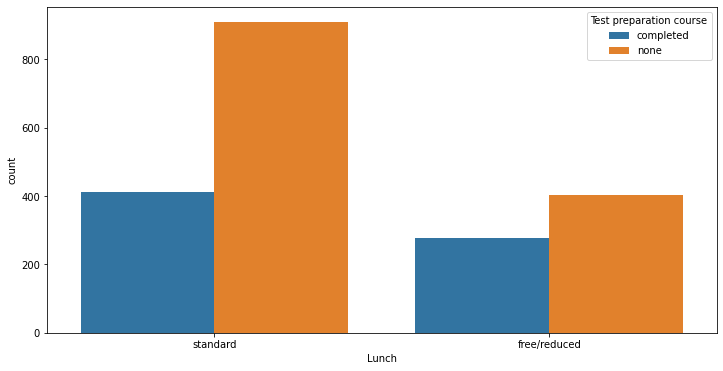

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'Lunch', hue = 'Test preparation course', data = df)

Зависимость между баллами по тесту по математике и баллами по чтению

Предлагаю так сделать сразу все красиво

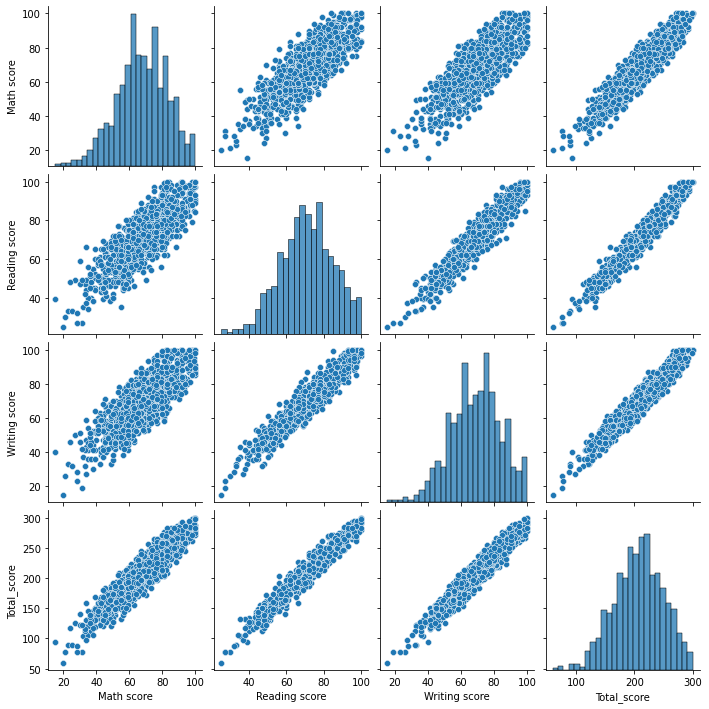

In [78]:
sns.pairplot(df.drop(['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch', 'Test preparation course'], axis=1))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Math score', ylabel='Reading score'>

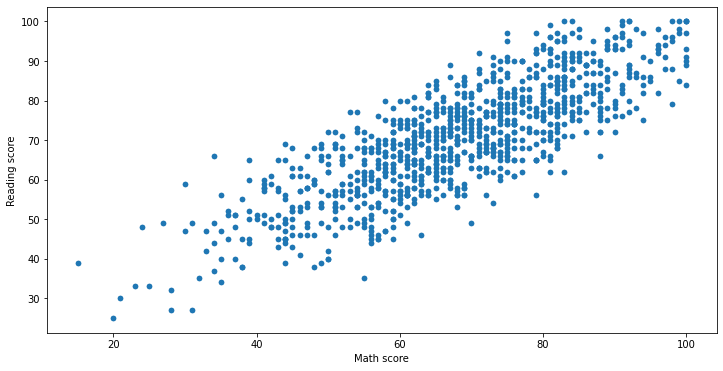

In [22]:
df.plot(kind = 'scatter', x = 'Math score', y = 'Reading score', figsize=(12 , 6))

Зависимость между баллами по математике и баллами по письму

<Axes: xlabel='Math score', ylabel='Writing score'>

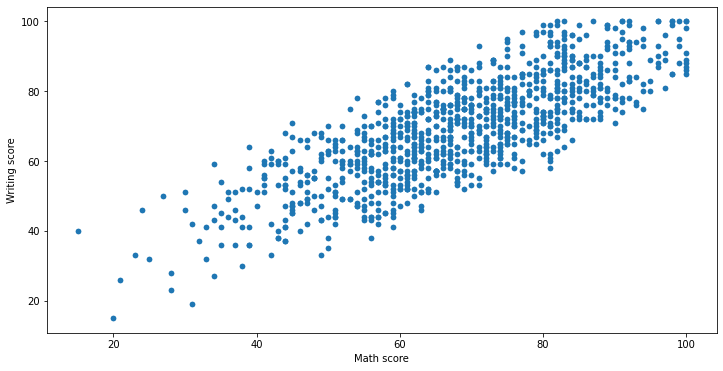

In [23]:
df.plot(kind = 'scatter', x = 'Math score', y = 'Writing score', figsize=(12 , 6))

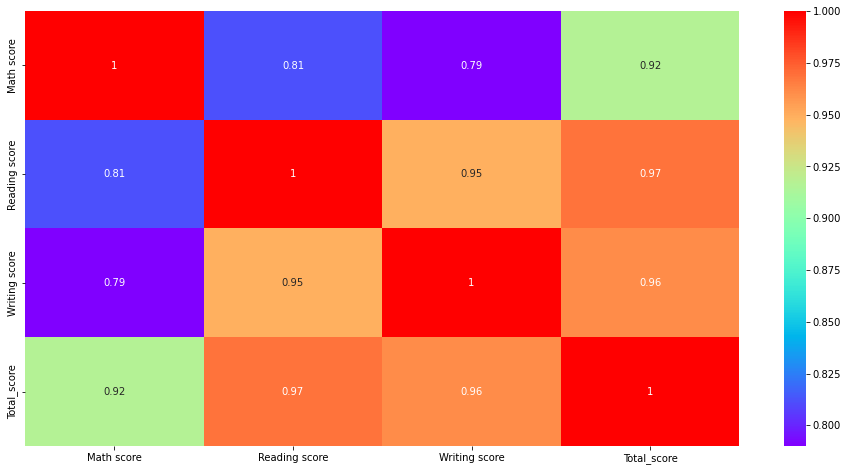

In [79]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

plt.show()

опишем статистические показатели

In [80]:
df.describe()

,Math score,Reading score,Writing score,Total_score
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,67.810000,70.382000,69.140000,207.332000
std,15.246381,14.103884,15.022158,42.073042
min,15.000000,25.000000,15.000000,60.000000
25%,58.000000,61.000000,59.000000,178.750000
50%,68.000000,70.500000,70.000000,209.000000
75%,79.250000,80.000000,80.000000,238.000000
max,100.000000,100.000000,100.000000,300.000000


## Гипотезы

1. Пол не влияет на общий балл


2. Раса на влияет на общий балл


3. Наличие ученой степени у родителя повышает шансы ребенка иметь высокий общий балл


4. Студенты, которые ели бесплатный ланч и не прошли подготовительный курс учатся хуже


5. Чем выше балл студента по математике, тем больше его общий балл


6. Чем больше общий балл студента, тем больше он девочка) 

# Часть 3. Построение модели

### 0. Цели и методы

Для начала хочется понять, что вообще мы пытаемся сделать. Мы попытаемся создать модель, которая по характеристикам студента (все наши категориальные переменные) и его баллам за математику, чтение и письмо предскажет его общий балл. Почему общий балл? Потому что это универсальный способ оценить знания студента, который используется для выдачи грантов, поступлении в университет и других важных мероприятий в жизни ученика. То есть потом исходя из этого балла можно строить более сложные модели, например, опять же вероятность поступить на бюджет, или тестировать гипотезы. Кроме того, наша модель поможет понять, какими социально-демографическими характеристиками обладают студенты, получившие определенный балл.

Для предсказания общего балла студента мы будем использовать линейные модели:
- Линейную регрессию
- Ridge регрессию
- Lasso регрессию

In [38]:
df

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total_score
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254
...,...,...,...,...,...,...,...,...,...
1995,male,group C,some college,standard,none,77,77,71,225
1996,male,group C,some college,standard,none,80,66,66,212
1997,female,group A,high school,standard,completed,67,86,86,239
1998,male,group E,high school,standard,none,80,72,62,214


### 1. Кодировка переменных

У нас много категориальных переменных. Мы их закодируем, используя One Hot Encoding. Чтобы не перегружать будущую модель уберем одну из каждых категорий

In [39]:
df_coded = df
df_coded = pd.get_dummies(df_coded, drop_first=True).head()
df_coded

,Math score,Reading score,Writing score,Total_score,Gender_male,Race/ethnicity_group B,Race/ethnicity_group C,Race/ethnicity_group D,Race/ethnicity_group E,Parental level of education_bachelor's degree,Parental level of education_high school,Parental level of education_master's degree,Parental level of education_some college,Parental level of education_some high school,Lunch_standard,Test preparation course_none
0,59,70,78,207,0,0,0,1,0,0,0,0,1,0,1,0
1,96,93,87,276,1,0,0,1,0,0,0,0,0,0,1,1
2,57,76,77,210,0,0,0,1,0,0,0,0,1,0,0,1
3,70,70,63,203,1,1,0,0,0,0,0,0,1,0,0,1
4,83,85,86,254,0,0,0,1,0,0,0,0,0,0,1,1


Следующий шаг - масштабирование. Это очень важно для линейных моделей, так как это ускоряет обучение и повышает интерпретируемость модели.

Мы нормализуем данные с помощью StandardScaler в sklearn.

In [128]:
df_coded = pd.DataFrame(scale(df_coded),columns=df_coded.columns)
df_coded.head()

,Math score,Reading score,Writing score,Total_score,Gender_male,Race/ethnicity_group B,Race/ethnicity_group C,Race/ethnicity_group D,Race/ethnicity_group E,Parental level of education_bachelor's degree,Parental level of education_high school,Parental level of education_master's degree,Parental level of education_some college,Parental level of education_some high school,Lunch_standard,Test preparation course_none
0,-0.948200,-0.980444,-0.023224,-0.779773,-0.816497,-0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.816497,0.0,0.816497,-2.0
1,1.557757,1.582081,1.021875,1.559546,1.224745,-0.5,0.0,0.5,0.0,0.0,0.0,0.0,-1.224745,0.0,0.816497,0.5
2,-1.083657,-0.311960,-0.139347,-0.678064,-0.816497,-0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.816497,0.0,-1.224745,0.5
3,-0.203186,-0.980444,-1.765057,-0.915386,1.224745,2.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.816497,0.0,-1.224745,0.5
4,0.677285,0.690768,0.905753,0.813676,-0.816497,-0.5,0.0,0.5,0.0,0.0,0.0,0.0,-1.224745,0.0,0.816497,0.5


### 2. Деление выборки и описание переменных

Мы разделим выборку на трейн-тест в соотношении 8:2. Фиксируем random_state. чтобы можно было делать выводы

In [129]:
df_train, df_test = train_test_split(df_coded, test_size = 0.2, random_state = 15) 

Теперь выделим целевую переменную - общий балл, и признаки

In [130]:
Y_train = df_train['Total_score'].to_numpy()  
Y_test = df_test['Total_score'].to_numpy()    # целевая переменная - общий балл

X_train = df_train.drop('Total_score', axis=1).to_numpy() # признаки
X_test = df_test.drop('Total_score', axis=1).to_numpy()

Посмотрим, какие признаки у нас получились 

In [131]:
feature_names = df_train.drop('Total_score', axis=1).columns # названия признаков
feature_names

Index(['Math score', 'Reading score', 'Writing score', 'Gender_male',
       'Race/ethnicity_group B', 'Race/ethnicity_group C',
       'Race/ethnicity_group D', 'Race/ethnicity_group E',
       'Parental level of education_bachelor's degree',
       'Parental level of education_high school',
       'Parental level of education_master's degree',
       'Parental level of education_some college',
       'Parental level of education_some high school', 'Lunch_standard',
       'Test preparation course_none'],
      dtype='object')

### 3. Обучение модели

Мы будем обучать наши модели по такому плану:
    
1. Объявим собственно модель
2. С помощью GridSearchCV подберем доступные гиперпараметры (с помощью минимизации mean_absolute_error)
3. Выберем наилучшие из них
4. Построим регрессии с использованием этих параметров и найдем коэффициенты 

В самом конце мы рассчитаем основные метрики качества модели и выберем лучшую

##### Линейная

In [132]:
lin_reg = LinearRegression() # объявляем модель

In [133]:
lin_reg.fit(X_train, Y_train)    # обучаем модель на тестовой выборке

lin_reg.coef_, model.intercept_    # ищем коэффициенты

(array([ 0.21507952,  0.24895142,  0.16195168,  0.15470915, -0.09599483,
         0.        ,  0.09599483,  0.        ,  0.        ,  0.        ,
         0.        , -0.17975879,  0.        ,  0.07837945,  0.12416383]),
 0.8673271301248349)

##### Ridge

In [134]:
ridge = Ridge() # объявляем модель

In [135]:
# подбираем гиперпараметры

grid_ridge = GridSearchCV(estimator=ridge,
                       param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 3.0, 5.0, 10.0, 20, 50, 100]},
                       scoring='neg_mean_absolute_error',
                       cv=4,
                       return_train_score=True,
                       verbose=1)

grid_ridge.fit(X_train,Y_train)

Fitting 4 folds for each of 11 candidates, totalling 44 fits


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 3.0, 5.0, 10.0,
                                   20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [136]:
grid_ridge.best_params_   # ищем лучший параметр

{'alpha': 0.001}

In [137]:
ridge = Ridge(alpha = 0.001)   # строим модель от лучшего параметра

ridge.fit(X_train, Y_train)   # обучаем модель на тестовой выборке

ridge.coef_     # ищем коэффициенты

array([ 0.21506113,  0.24893028,  0.16194475,  0.15465799, -0.09598623,
        0.        ,  0.09598623,  0.        ,  0.        ,  0.        ,
        0.        , -0.179764  ,  0.        ,  0.07837243,  0.1241788 ])

##### Lasso

In [138]:
lasso = Lasso() # объявляем модель

In [139]:
# подбираем гиперпараметры

grid_lasso = GridSearchCV(estimator=lasso,
                       param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 3.0, 5.0, 10.0, 20, 50, 100]},
                       scoring='neg_mean_absolute_error',
                       cv=4,
                       return_train_score=True,
                       verbose=1)

grid_lasso.fit(X_train, Y_train)

Fitting 4 folds for each of 11 candidates, totalling 44 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.049e-04, tolerance: 3.872e-04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e-04, tolerance: 1.849e-04
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.220e-04, toleranc

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 3.0, 5.0, 10.0,
                                   20, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
grid_lasso.best_params_   # ищем лучший параметр

{'alpha': 0.001}

In [141]:
lasso = Lasso(alpha = 0.001)     # строим модель от лучшего параметра

lasso.fit(X_train, Y_train)   # обучаем модель на тестовой выборке

lasso.coef_    # ищем коэффициенты

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.532e-04, tolerance: 4.425e-04
  model = cd_fast.enet_coordinate_descent(


array([ 0.41866308,  0.38960722,  0.25676485, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.01055249,  0.        ,  0.        ,  0.        ])

##### Предсказываем на тестовой выборке общий балл с помощью моделей

In [142]:
lin_reg_pred = lin_reg.predict(X_test)  # линейная
lasso_pred =  lasso.predict(X_test)    # lasso
ridge_pred = ridge.predict(X_test)   # ridge

##### Используем метрики для оценки качества модели

*MSE*

In [143]:
print(f'Lasso MSE: {mse(Y_test, lasso_pred)}')
print(f'Ridge MSE: {mse(Y_test, ridge_pred)}')
print(f'LinearRegression MSE: {mse(Y_test, lin_reg_pred)}')

Lasso MSE: 0.005336184491941496
Ridge MSE: 0.02798235325942019
LinearRegression MSE: 0.027952046959949368


*MAE*

In [144]:
print(f'Lasso MAE: {mae(Y_test, lasso_pred)}')
print(f'Ridge MAE: {mae(Y_test, ridge_pred)}')
print(f'LinearRegression MAE: {mse(Y_test, lin_reg_pred)}')

Lasso MAE: 0.07304919227439477
Ridge MAE: 0.16727926727308495
LinearRegression MAE: 0.027952046959949368


*MAPE*

In [145]:
print(f'Lasso MAPE: {mape(Y_test, lasso_pred)}')
print(f'Ridge MAPE: {mape(Y_test, ridge_pred)}')
print(f'LinearRegression MAPE: {mape(Y_test, lin_reg_pred)}')

Lasso MAPE: 0.1077320809692858
Ridge MAPE: 0.24670147615942412
LinearRegression MAPE: 0.24656784489849817


На основе этих трех метрик можно сделать вывод, что регрессия Лассо лучше всего подходит для предсказания общего балла студентов. Она значительно меньше Риджа (как и линейная) не смотря на то, что его лучший гиперпараметр близок к 0, что делает модель максимально близкой к линейной регрессии, а вот зануление коэффициентов, как в случае с Лассо. оказалось более эффективным, но все же проиграло линейной модели